# Principal Component Analysis

In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# importing the BodyMearurements dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/BodyMeasurements.csv')
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


Columns name translations:
- Gender -> Genere
- Age -> Età
- HeadCircumference -> CirconferenzaTesta
- ShoulderWidth -> LarghezzaSpalle
- ChestWidth -> LarghezzaTorace
- Belly -> Pancia
- Waist -> Vita
- Hips -> Fianchi
- ArmLength -> LunghezzaBraccio
- ShoulderToWaist -> SpallaAVita
- WaistToKnee -> VitaAGinocchio
- LegLength -> LunghezzaGamba
- TotalHeight -> AltezzaTotale

## Cleaning outlier data


In [4]:
column_names = ['Belly', 'ArmLength', "ShoulderWidth", "HeadCircumference", "WaistToKnee", "Waist"]

for column_name in column_names:
    # Select the columns "column_name"
    CN_data = df[column_name]
    # Calculate the mean and standard deviation of the data
    mean = CN_data.mean()
    std = CN_data.std()
    # Define the threshold for identifying outliers (number of standard deviations from the mean)
    threshold = 3 #Se un valore è lontano più di 3 std dalla media
    # Compute the thresholds for outlier detection
    computed_threshold = threshold * std
    # Identify outliers based on the standard deviation method
    standard_deviation_CN_outliers = np.abs(CN_data - mean) > computed_threshold #Tutti True e False
    # Count the number of outliers
    num_outliers = standard_deviation_CN_outliers.sum()
    # Print the results
    print(f"Column: {column_name}")
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std}")
    print(f"Threshold: {threshold}")
    print(f"Computed Threshold: {computed_threshold}")
    print(f"Number of Outliers: {num_outliers}\n")

    df = df[~standard_deviation_CN_outliers]

Column: Belly
Mean: 20.199720670391063
Standard Deviation: 10.132992568012883
Threshold: 3
Computed Threshold: 30.39897770403865
Number of Outliers: 1

Column: ArmLength
Mean: 18.82097902097902
Standard Deviation: 5.379320986729714
Threshold: 3
Computed Threshold: 16.137962960189142
Number of Outliers: 4

Column: ShoulderWidth
Mean: 14.313642756680732
Standard Deviation: 4.770073620546846
Threshold: 3
Computed Threshold: 14.310220861640538
Number of Outliers: 1

Column: HeadCircumference
Mean: 20.585915492957746
Standard Deviation: 3.7409522548169845
Threshold: 3
Computed Threshold: 11.222856764450952
Number of Outliers: 3

Column: WaistToKnee
Mean: 16.536067892503535
Standard Deviation: 5.159197934449582
Threshold: 3
Computed Threshold: 15.477593803348746
Number of Outliers: 1

Column: Waist
Mean: 19.211048158640228
Standard Deviation: 8.678133752404824
Threshold: 3
Computed Threshold: 26.03440125721447
Number of Outliers: 8



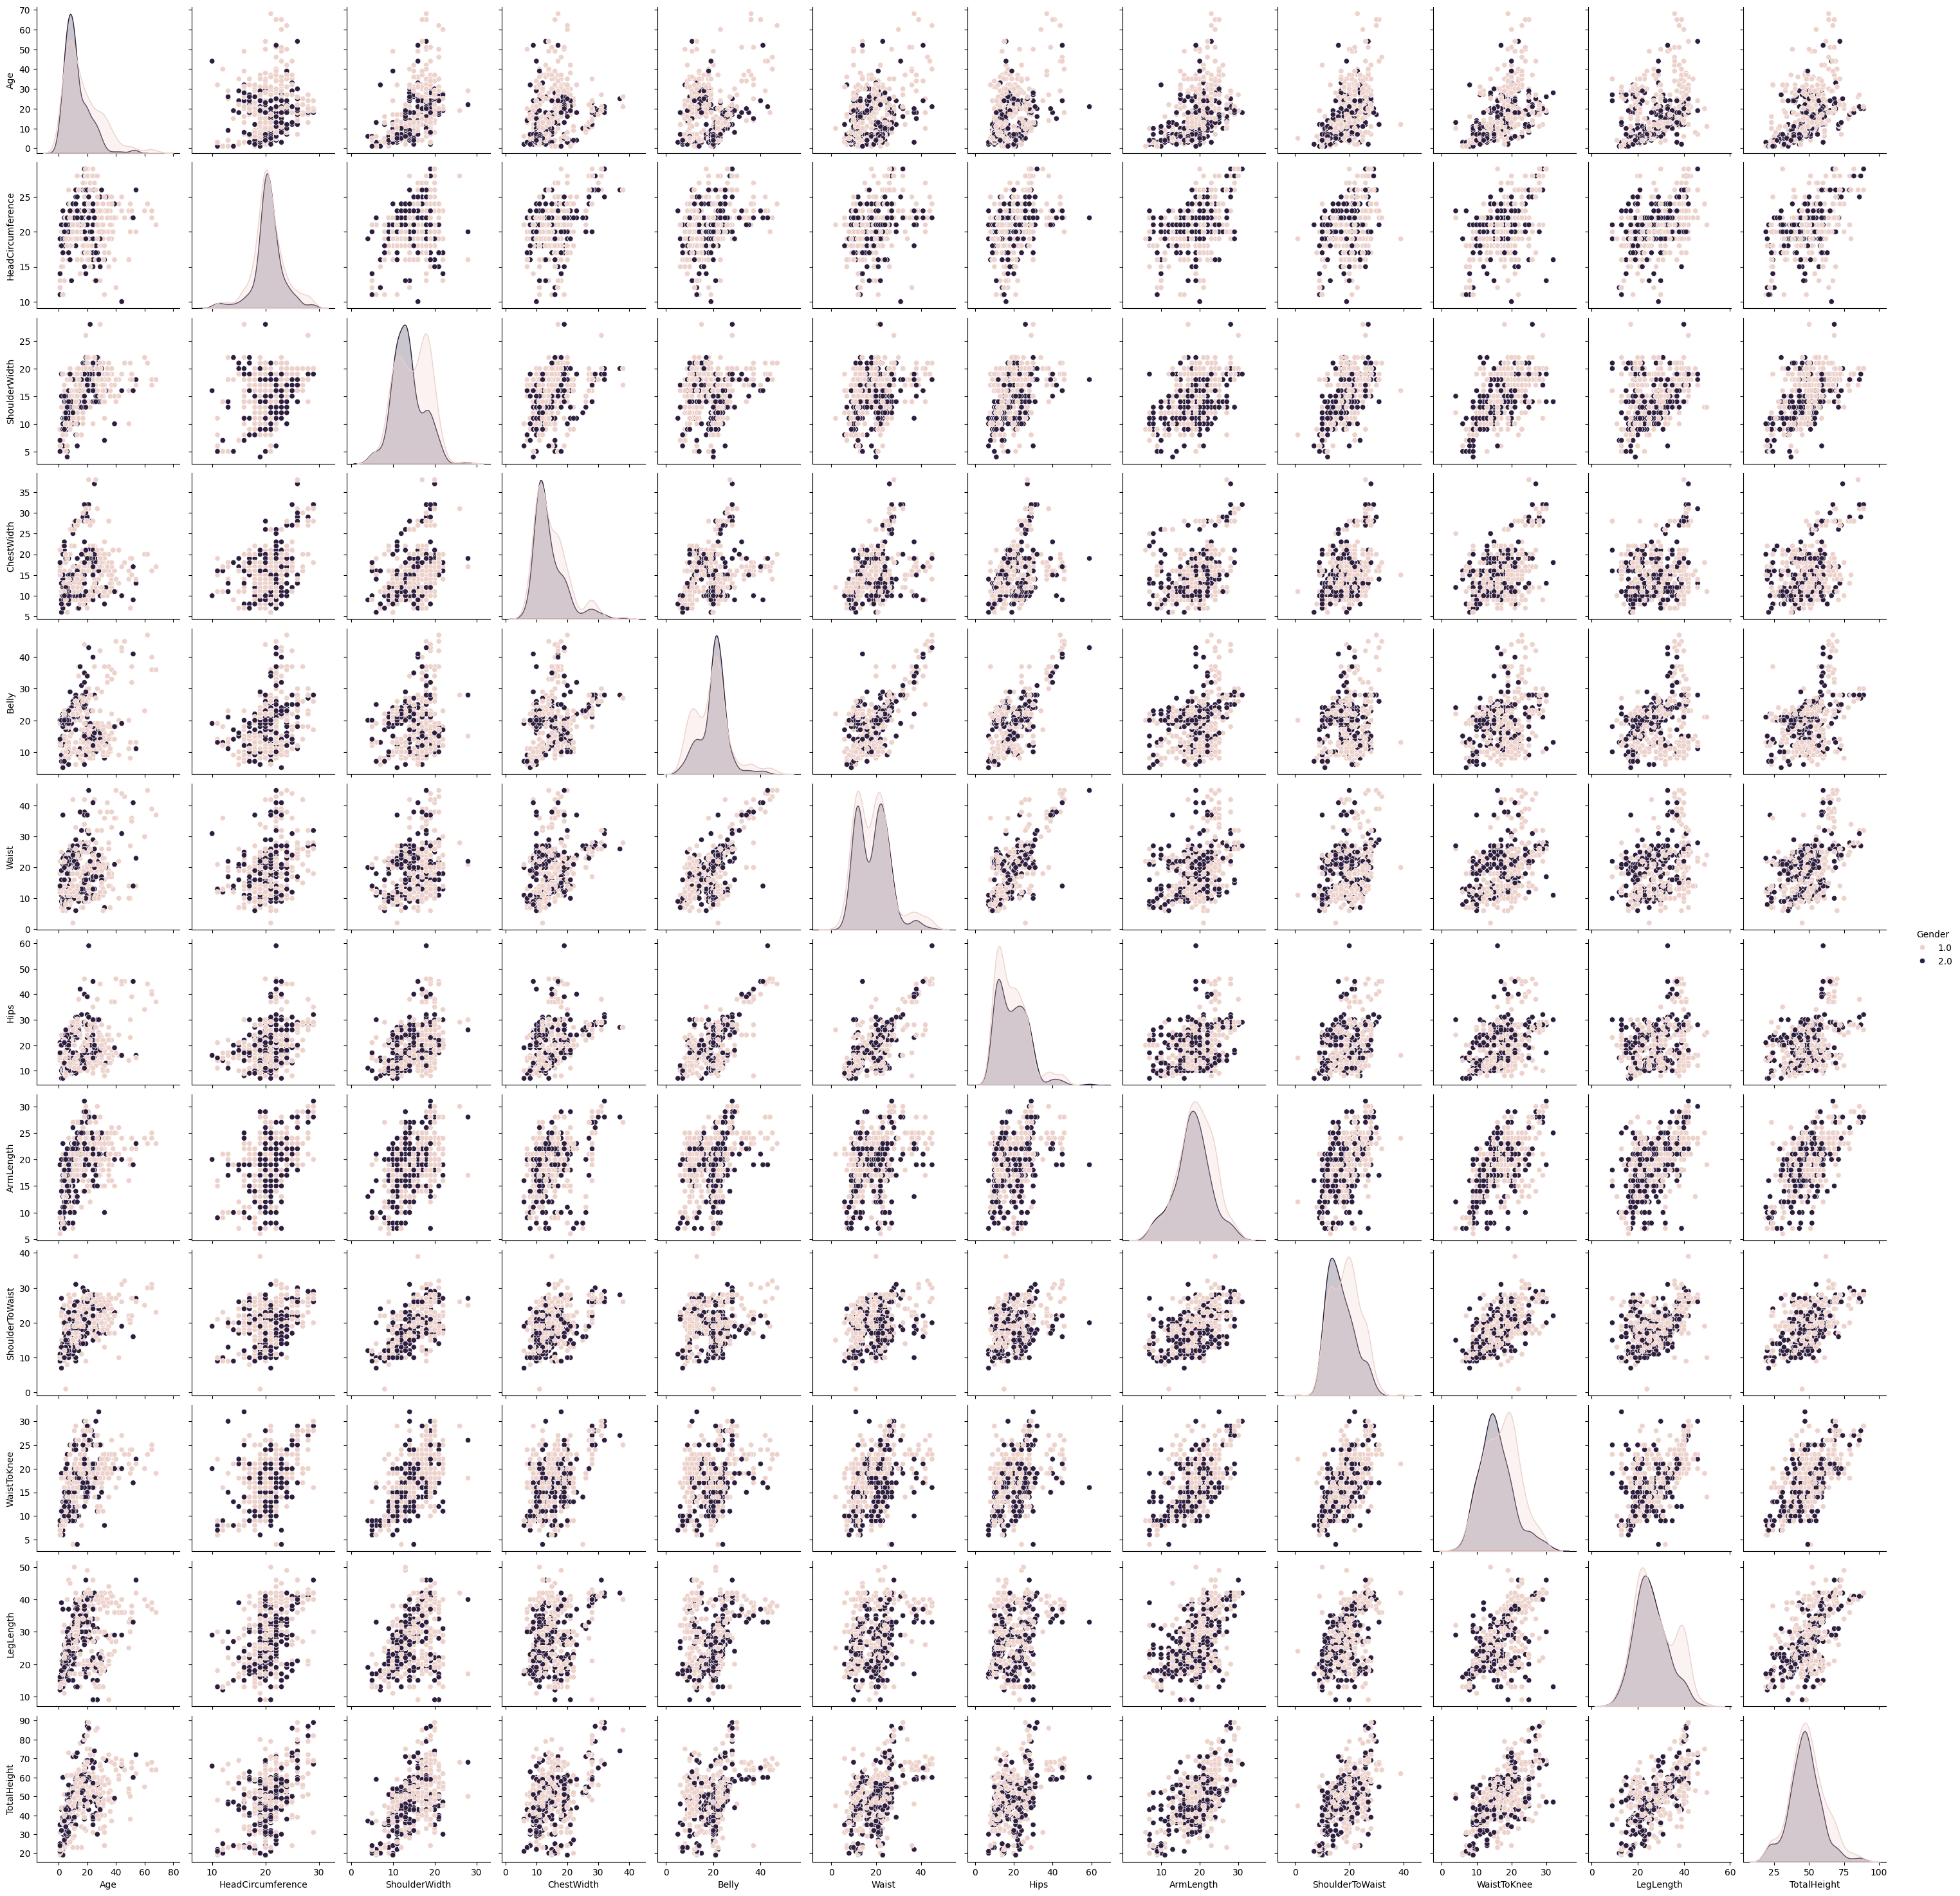

In [ ]:
# Pairplot
sns.pairplot(df, hue='Gender')

In [ ]:
df.columns

Index(['Gender', 'Age', 'HeadCircumference', 'ShoulderWidth', 'ChestWidth',
       'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee',
       'LegLength', 'TotalHeight'],
      dtype='object')

## Mantain some columns

In [ ]:
df = df[['HeadCircumference', 'ShoulderWidth', 'ChestWidth', 'Belly', 'Waist', 'Hips', 'ArmLength', 'ShoulderToWaist', 'WaistToKnee', 'LegLength', 'TotalHeight']]

In [ ]:
# Standardize the data ----> Very impo for PCA!
scaler = StandardScaler()

In [ ]:
cols = df.columns

# Standardize the data
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=cols) #Ricreo df perchè lo scaler restituisce array
df_standardized.head()

HeadCircumference  ShoulderWidth  ChestWidth     Belly     Waist      Hips  \
0           0.501162       0.985628    1.029307 -0.268436 -0.625480  0.353320   
1          -0.533782       2.011298    0.463593 -0.268436  0.286515  0.723430   
2           0.156181       0.985628    0.275022 -0.850326 -1.146619 -0.510272   
3          -0.188801       1.498463    0.652165 -1.286743  0.025945 -0.633642   
4          -1.568727      -0.040042    0.652165 -0.995798 -1.016334  1.340281   

   ArmLength  ShoulderToWaist  WaistToKnee  LegLength  TotalHeight  
0   0.724511         1.348255     1.681976  -0.609939     0.323238  
1   2.016232         0.971822     1.681976  -0.864948     0.652730  
2   0.509224         0.030740    -0.489575  -1.119957     0.405611  
3   1.155085         0.595389     0.694907  -0.737443    -0.253374  
4   1.370372         0.783606     3.063872  -1.757479    -0.088628

In [ ]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1]) #Componenti = numero di colonne
pca.fit(df_standardized)
# Transform the data
x_new_cols = df_standardized.columns
x_new = pca.fit_transform(df_standardized)
x_new = pd.DataFrame(x_new, columns=[f'PC{i+1}' for i in range(x_new.shape[1])]) #Creo df dando nomi colonne "pc1", "pc2"...
x_new.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.774251 -1.420147 -1.003589  0.651268 -0.073550 -0.940765 -0.197000   
1  2.340610 -1.187736 -1.597537 -0.904326 -0.715450 -1.823647 -0.002929   
2 -0.416877 -1.440672 -0.304571  0.420617 -0.231861 -1.248987  0.575375   
3  0.627784 -1.858453 -1.208986 -0.034999 -0.089204 -1.132842 -0.108122   
4  0.809050 -1.386478 -2.409772 -0.321162 -1.475621 -1.536520 -1.356568   

        PC8       PC9      PC10      PC11  
0  0.563212  0.065994  0.630829 -0.523055  
1  0.285956 -0.206699 -0.056663  0.105608  
2 -0.647127  0.327149 -0.450789 -0.309226  
3 -0.157417 -0.130709 -0.193979  0.922260  
4  2.223553 -0.542208  0.277857 -1.226192

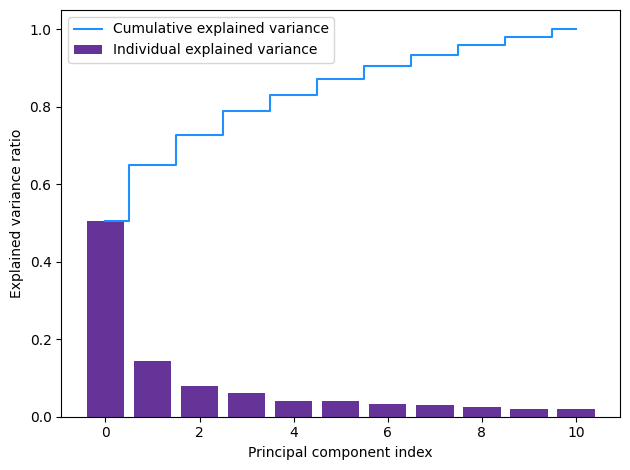

In [ ]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color='rebeccapurple')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color='dodgerblue')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Osservazioni:
- con le prime 3 componenti spieghiamo il 70% della varianza del dataset (solo la prima colonna il 50%)
- quindi possiamo utilizzare solo le prime 3 colonne: rispetto ad usarle tutte riduce il rumore.